# **Implementation of Xception**
Original paper: [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)

**A Basic Introduction to** [Separable Convolutions](https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728)

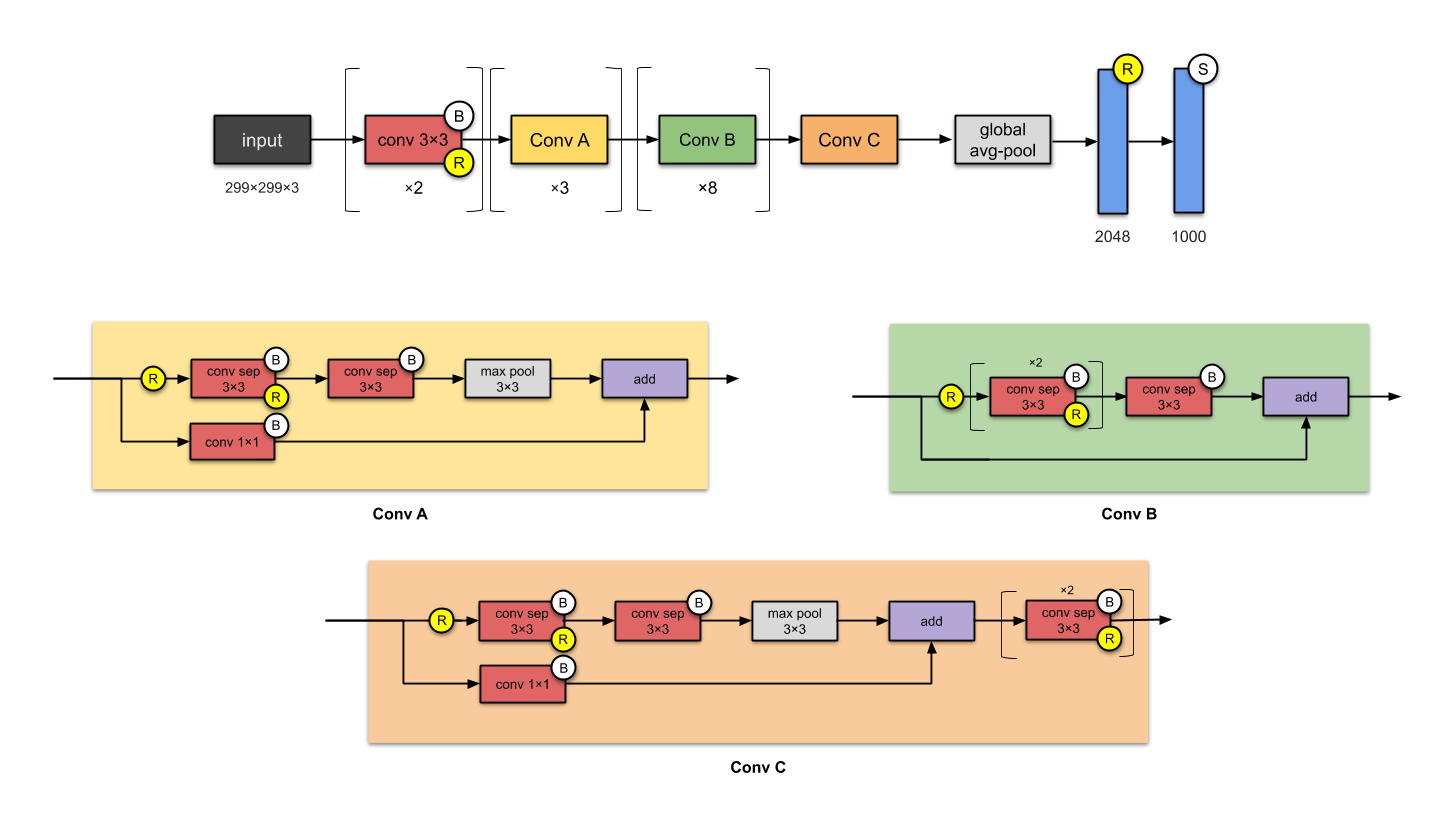

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 150, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 150, 150, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 150, 150, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

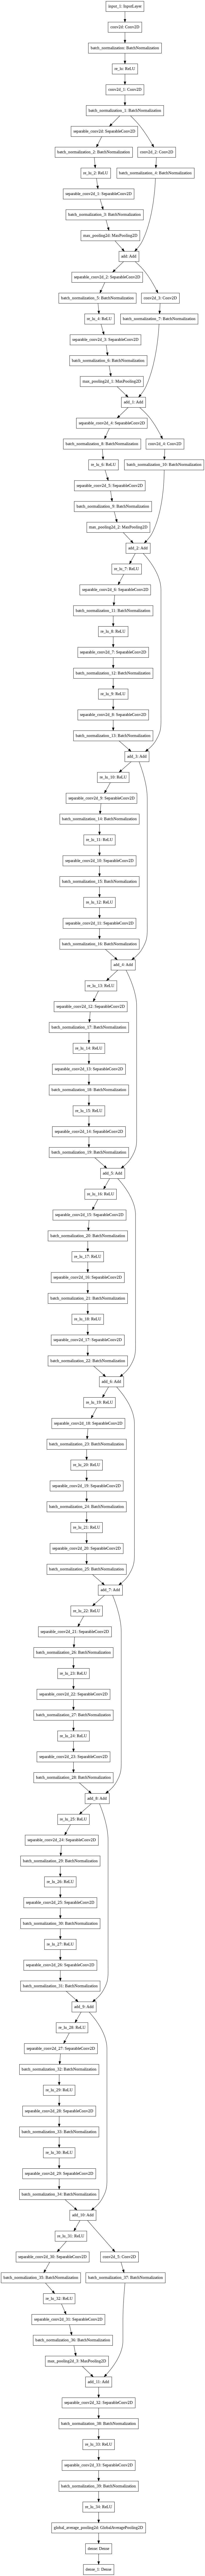

In [1]:
# Imports
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, Add, \
    Dense, BatchNormalization, ReLU, MaxPool2D, GlobalAvgPool2D
from tensorflow.keras import Model

# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,
               padding='same',
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

def sep_bn(x, filters, kernel_size, strides=1):
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

def conv_A(tensor, filter):
    x = ReLU()(tensor)
    x = sep_bn(tensor, filters=filter, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=filter, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=filter, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    return x

def conv_B(tensor):
    x = ReLU()(tensor)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)

    tensor = Add()([tensor, x])
    return tensor

def conv_C(tensor):
    x = ReLU()(tensor)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=1024, kernel_size=3)
    x = MaxPool2D(3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=1024, kernel_size=1, strides=2)
    x = Add()([tensor, x])

    x = sep_bn(x, filters=1536, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=2048, kernel_size=3)
    x = ReLU()(x)
    x = GlobalAvgPool2D()(x)
    return x
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# Input
input = Input(shape=(299, 299, 3))

# Blocks
my_model = conv_bn(input, filters=32, kernel_size=3, strides=2)
my_model = ReLU()(my_model)
my_model = conv_bn(my_model, filters=64, kernel_size=3)

# conv A
my_model = conv_A(my_model, 128)
my_model = conv_A(my_model, 256)
my_model = conv_A(my_model, 728)

# conv B
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)

# conv C
my_model = conv_C(my_model)

# Dense layers
my_model = Dense(units=2048, activation='relu')(my_model)

# Output layer
output = Dense(units=1000, activation='softmax')(my_model)

# Model
Xception_model = Model(inputs=input, outputs=output)

print(Xception_model.summary())

from tensorflow.keras.utils import plot_model
plot_model(Xception_model)

